In [ ]:
!pip install causal-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
data=np.array([1,1,3,4,5,5])


In [ ]:
import sys
import io
from causallearn.score.LocalScoreFunction import local_score_BDeu
from causallearn.utils.GraphUtils import GraphUtils
sys.path.append("")
import unittest
import warnings
from pickle import load
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

from causallearn.search.ScoreBased.GES import ges


class TestGES(unittest.TestCase):
    # Learning the causal structure with generalized score-based method and with GES search. The score function can be
    # negative cross-validated log-likelihood or marginal log-likelihood with regression in RKHS

    # example1
    # for data with single-variate dimensions
    # and score function is negative cross-validated log-likelihood
    def test_single_CV(self):
        with open("example_data1.pk", 'rb') as example_data1:
            # example_data1 = load(open("example_data1.pk", 'rb'))
            example_data1 = load(example_data1)
            G_truth = example_data1['G_truth']
            X = example_data1['X']
            X = X - np.tile(np.mean(X, axis=0), (X.shape[0], 1))
            X = np.dot(X, np.diag(1 / np.std(X, axis=0)))
            maxP = 5  # maximum number of parents when searching the graph
            parameters = {'kfold': 10, 'lambda': 0.01}
            X = X[:50, :]
            Record = ges(X, 'local_score_CV_general', maxP=maxP, parameters=parameters)

            pyd = GraphUtils.to_pydot(Record['G'])
            tmp_png = pyd.create_png(f="png")
            fp = io.BytesIO(tmp_png)
            img = mpimg.imread(fp, format='png')
            plt.axis('off')
            plt.imshow(img)
            plt.show()

            print(Record)

    # example2
    # for data with single-variate dimensions
    # and score function is negative marginal likelihood
    def test_single_marginal(self):
        with open("example_data1.pk", 'rb') as example_data1:
            # example_data1 = load(open("example_data1.pk", 'rb'))
            example_data1 = load(example_data1)
            G_truth = example_data1['G_truth']
            X = example_data1['X']
            X = X - np.tile(np.mean(X, axis=0), (X.shape[0], 1))
            X = np.dot(X, np.diag(1 / np.std(X, axis=0)))

            maxP = 5  # maximum number of parents when searching the graph
            parameters = {'kfold': 10, 'lambda': 0.01}
            X = X[:50, :]
            Record = ges(X, 'local_score_marginal_general', maxP=maxP, parameters=parameters)

            pyd = GraphUtils.to_pydot(Record['G'])
            tmp_png = pyd.create_png(f="png")
            fp = io.BytesIO(tmp_png)
            img = mpimg.imread(fp, format='png')
            plt.axis('off')
            plt.imshow(img)
            plt.show()

            print(Record)

    # example3
    # for data with multi-dimensional variables
    # and score function is negative cross-validated log-likelihood
    def test_multi_CV(self):
        with open("example_data2.pk", 'rb') as example_data:
            # example_data = load(open("example_data2.pk", 'rb'))
            example_data = load(example_data)
            Data_save = example_data['Data_save']
            G_save = example_data['G_save']
            d_label_save = example_data['d_label_save']

            trial = 0
            N = G_save[trial].shape[0]
            X = Data_save[trial]
            X = X - np.tile(np.mean(X, axis=0), (X.shape[0], 1))
            X = np.dot(X, np.diag(1 / np.std(X, axis=0)))
            maxP = 3  # maximum number of parents when searching the graph
            parameters = {'kfold': 10,
                          'lambda': 0.01,
                          'dlabel': d_label_save[trial]}  # indicate which dimensions belong to the i-th variable.
            X = X[:50, :]
            Record = ges(X, 'local_score_CV_multi', maxP=maxP, parameters=parameters)

            pyd = GraphUtils.to_pydot(Record['G'])
            tmp_png = pyd.create_png(f="png")
            fp = io.BytesIO(tmp_png)
            img = mpimg.imread(fp, format='png')
            plt.axis('off')
            plt.imshow(img)
            plt.show()

            print(Record)

    # example4
    # for data with multi-dimensional variables
    # and score function is negative marginal likelihood
    def test_multi_marginal(self):
        with open("example_data2.pk", 'rb') as example_data:
            # example_data = load(open("example_data2.pk", 'rb'))
            example_data = load(example_data)
            Data_save = example_data['Data_save']
            G_save = example_data['G_save']
            d_label_save = example_data['d_label_save']

            trial = 0
            N = G_save[trial].shape[0]
            X = Data_save[trial]
            X = X - np.tile(np.mean(X, axis=0), (X.shape[0], 1))
            X = np.dot(X, np.diag(1 / np.std(X, axis=0)))
            maxP = 3  # maximum number of parents when searching the graph
            parameters = {'kfold': 10,
                          'lambda': 0.01,
                          'dlabel': d_label_save[trial]}  # indicate which dimensions belong to the i-th variable.
            X = X[:50, :]
            Record = ges(X, 'local_score_marginal_multi', maxP=maxP, parameters=parameters)

            pyd = GraphUtils.to_pydot(Record['G'])
            tmp_png = pyd.create_png(f="png")
            fp = io.BytesIO(tmp_png)
            img = mpimg.imread(fp, format='png')
            plt.axis('off')
            plt.imshow(img)
            plt.show()

            print(Record)

    # example5
    # for data with single-variate dimensions
    # and score function is BIC score
    def test_single_BIC(self):
        with open("example_data3.pk", 'rb') as example_data:
            # example_data = load(open("example_data3.pk", 'rb'))
            example_data = load(example_data)
            X = example_data['X']
            maxP = example_data['maxP']
            # X = X[:50, :]
            Record = ges(X, 'local_score_BIC', maxP=maxP)

            pyd = GraphUtils.to_pydot(Record['G'])
            tmp_png = pyd.create_png(f="png")
            fp = io.BytesIO(tmp_png)
            img = mpimg.imread(fp, format='png')
            plt.axis('off')
            plt.imshow(img)
            plt.show()

            print(Record)

    # example6
    # for data with single-variate dimensions
    # and score function is BDeu score
    def test_single_BDeu(self):
        X = np.loadtxt('example_data5.txt')
        Record = ges(X, 'local_score_BDeu', maxP=5)

        pyd = GraphUtils.to_pydot(Record['G'])
        tmp_png = pyd.create_png(f="png")
        fp = io.BytesIO(tmp_png)
        img = mpimg.imread(fp, format='png')
        plt.axis('off')
        plt.imshow(img)
        plt.show()

        print(Record)

    # example7
    def test_score_function_BDeu(self):
        X = np.loadtxt('example_data6.txt').T
        X = np.mat(X)
        parameters = {'sample_prior': 1,  # default ess = 1
                      'structure_prior': 1,
                      'r_i_map': {i: len(np.unique(np.asarray(X[:, i]))) for i in range(X.shape[1])}}

        score = local_score_BDeu(X, 20, [24], parameters)

        print(score)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0]]
[[ 0  1  0  0  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  0  0  0]]
[[ 0 -1

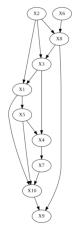

{'update1': [[6, 3, ()], [9, 6, ()], [1, 0, ()], [4, 9, [6]], [7, 5, ()], [0, 4, ()], [1, 7, [5]], [3, 2, ()], [0, 2, ()], [7, 8, ()], [2, 1, ()], [9, 8, ()], [4, 3, (2,)], [0, 9, ()], [7, 2, ()]], 'update2': [], 'G_step1': [<causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095c5eb20>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095bf6f40>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095bf6bb0>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095bf85e0>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095bf8df0>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095bfcf40>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095bfea90>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095c00ee0>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095c00c10>, <causallearn.graph.GeneralGraph.GeneralGraph object at 0x7f6095c003d0>, <causallearn.graph.GeneralGraph.GeneralGraph object at 

In [ ]:
from causallearn.search.ScoreBased.GES import ges

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

with open("example_data1.pk", 'rb') as example_data1:
            # example_data1 = load(open("example_data1.pk", 'rb'))
            example_data1 = load(example_data1)
            G_truth = example_data1['G_truth']
            X = example_data1['X']
            X = X - np.tile(np.mean(X, axis=0), (X.shape[0], 1))
            X = np.dot(X, np.diag(1 / np.std(X, axis=0)))
            maxP = 10  # maximum number of parents when searching the graph
            parameters = {'kfold': 10, 'lambda': 0.01}
            X = X[:50, :]
            Record = ges(X, 'local_score_CV_general', maxP=maxP, parameters=parameters)
            #Record = ges(X, 'local_score_BIC', maxP=maxP, parameters=parameters)

            pyd = GraphUtils.to_pydot(Record['G'])
            tmp_png = pyd.create_png(f="png")
            fp = io.BytesIO(tmp_png)
            img = mpimg.imread(fp, format='png')
            plt.axis('off')
            plt.imshow(img)
            plt.show()

            print(Record)

# or save the graph
pyd.write_png('simple_test10.png')

In [ ]:
print(example_data1['X'])

[[ 0.44229594  0.47722119  1.         ...  0.79050091  0.74973244
   0.99296001]
 [ 0.34760155  0.27953493  1.         ...  0.6863014   0.96295868
   0.83202738]
 [-0.16108262 -0.11377638  0.         ... -0.21502217 -0.04457829
  -0.49374771]
 ...
 [-0.46768544 -0.16820463  0.         ... -0.22720475  0.03271168
  -0.2371647 ]
 [ 0.36519111  0.1416438   2.         ...  0.61801182  0.91872247
   0.81896031]
 [-0.11894466 -0.3038887   1.         ...  0.89271029  0.99345645
   0.86569722]]


In [ ]:
print(len(example_data1['X']))

500


In [ ]:
print(len(example_data1['X'][0]))

10


In [ ]:
print(Record.keys())

dict_keys(['update1', 'update2', 'G_step1', 'G_step2', 'G', 'score'])


In [ ]:
print(Record["score"])

347.2786963957233
